# Learning Curves

In [1]:
try:
    from sklearn.model_selection import learning_curve
except:
    from sklearn.learning_curve import learning_curve
    
import numpy as np
import scipy.stats as st

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=50, n_informative=15, n_redundant=25, n_classes=2, random_state=101)

In [4]:
def learning_curve_plot(hypothesis, X,y, cv=10, confidence=0.95, scoring='accuracy', sizes = [ 0.1, 0.33, 0.55, 0.78, 1. ]):
    # Learning curve
    train_size, train_scores, test_scores = learning_curve(hypothesis, X, y, train_sizes= sizes, \
                                                           exploit_incremental_learning=False, \
                                                           cv=cv, scoring=scoring, n_jobs=-1)
    # Distributions
    mean_train  = np.mean(train_scores,axis=1)
    upper_train = np.clip(mean_train + np.std(train_scores, axis=1)*st.norm.ppf(confidence), 0, 1)
    lower_train = np.clip(mean_train - np.std(train_scores, axis=1)*st.norm.ppf(confidence), 0, 1)
    mean_test   = np.mean(test_scores,axis=1)
    upper_test = np.clip(mean_test + np.std(test_scores, axis=1)*st.norm.ppf(confidence), 0, 1)
    lower_test = np.clip(mean_test - np.std(test_scores, axis=1)*st.norm.ppf(confidence), 0, 1)
    # Plotting    
    plt.plot(train_size, mean_train, 'ro-', label='In-sample')
    plt.plot(train_size, mean_test, 'bo-', label='Cross-validated')
    plt.fill_between(train_size, upper_train, lower_train, alpha=0.1, color='r')
    plt.fill_between(train_size, upper_test, lower_test, alpha=0.1, color='b')
    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel(scoring) 
    plt.legend(loc='lower right', numpoints= 1)
    plt.show()

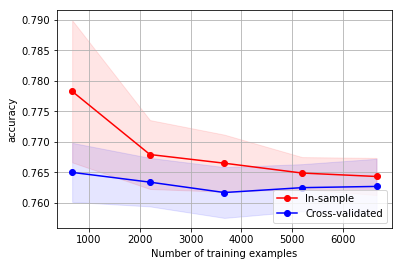

In [5]:
from sklearn.naive_bayes import BernoulliNB
hypothesis = BernoulliNB()
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

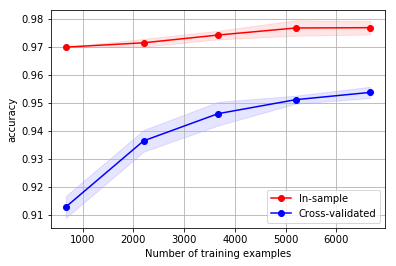

In [6]:
from sklearn.neighbors import KNeighborsClassifier
hypothesis = KNeighborsClassifier(n_neighbors=3)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

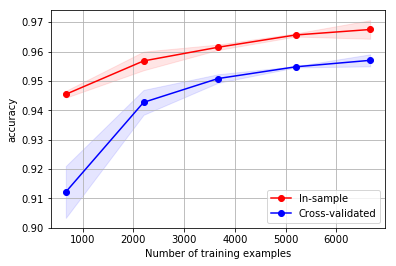

In [7]:
from sklearn.neighbors import KNeighborsClassifier
hypothesis = KNeighborsClassifier(n_neighbors=10)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

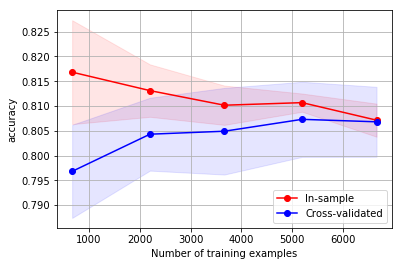

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

hypothesis =  make_pipeline(LogisticRegression()) 
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

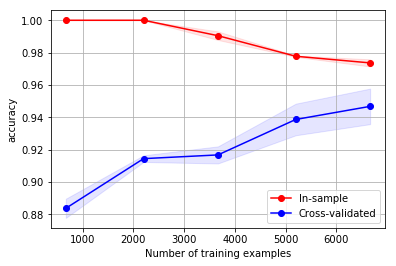

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

hypothesis =  make_pipeline(PolynomialFeatures(2), LogisticRegression()) 
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

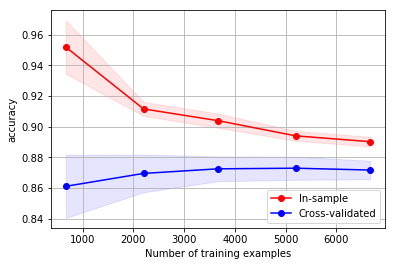

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
hypothesis = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=3)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

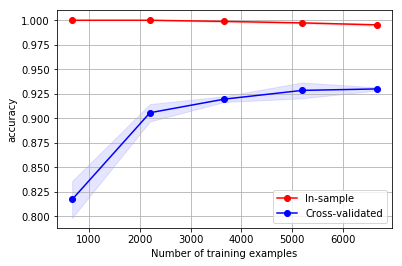

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
hypothesis = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=8)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

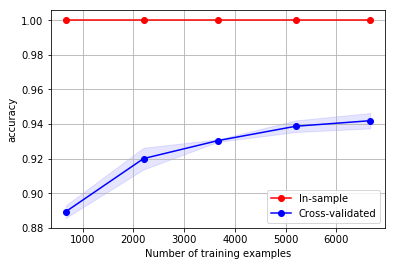

In [12]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

hypothesis = RandomForestClassifier(n_estimators=300, n_jobs=1)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')